# Niteroi Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [5]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
niteroi_lims = pnboia_limits_tests.niteroi

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [37]:
# filter data with

niteroi = filter_data(data=buoys_df_raw,
                    buoy='niteroi',
                    limits=niteroi_lims,
                    outlier_check=False,
                    t_continuity_check=False)

niteroi = niteroi.drop(columns=niteroi.filter(regex='dir|head|spread').columns)

# Filter bad period
niteroi = niteroi.loc[:'2017-05']

# Filter bad srad data
niteroi = niteroi.where(niteroi['srad'] < 1500)

# # Drop all-nans columns
# niteroi.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

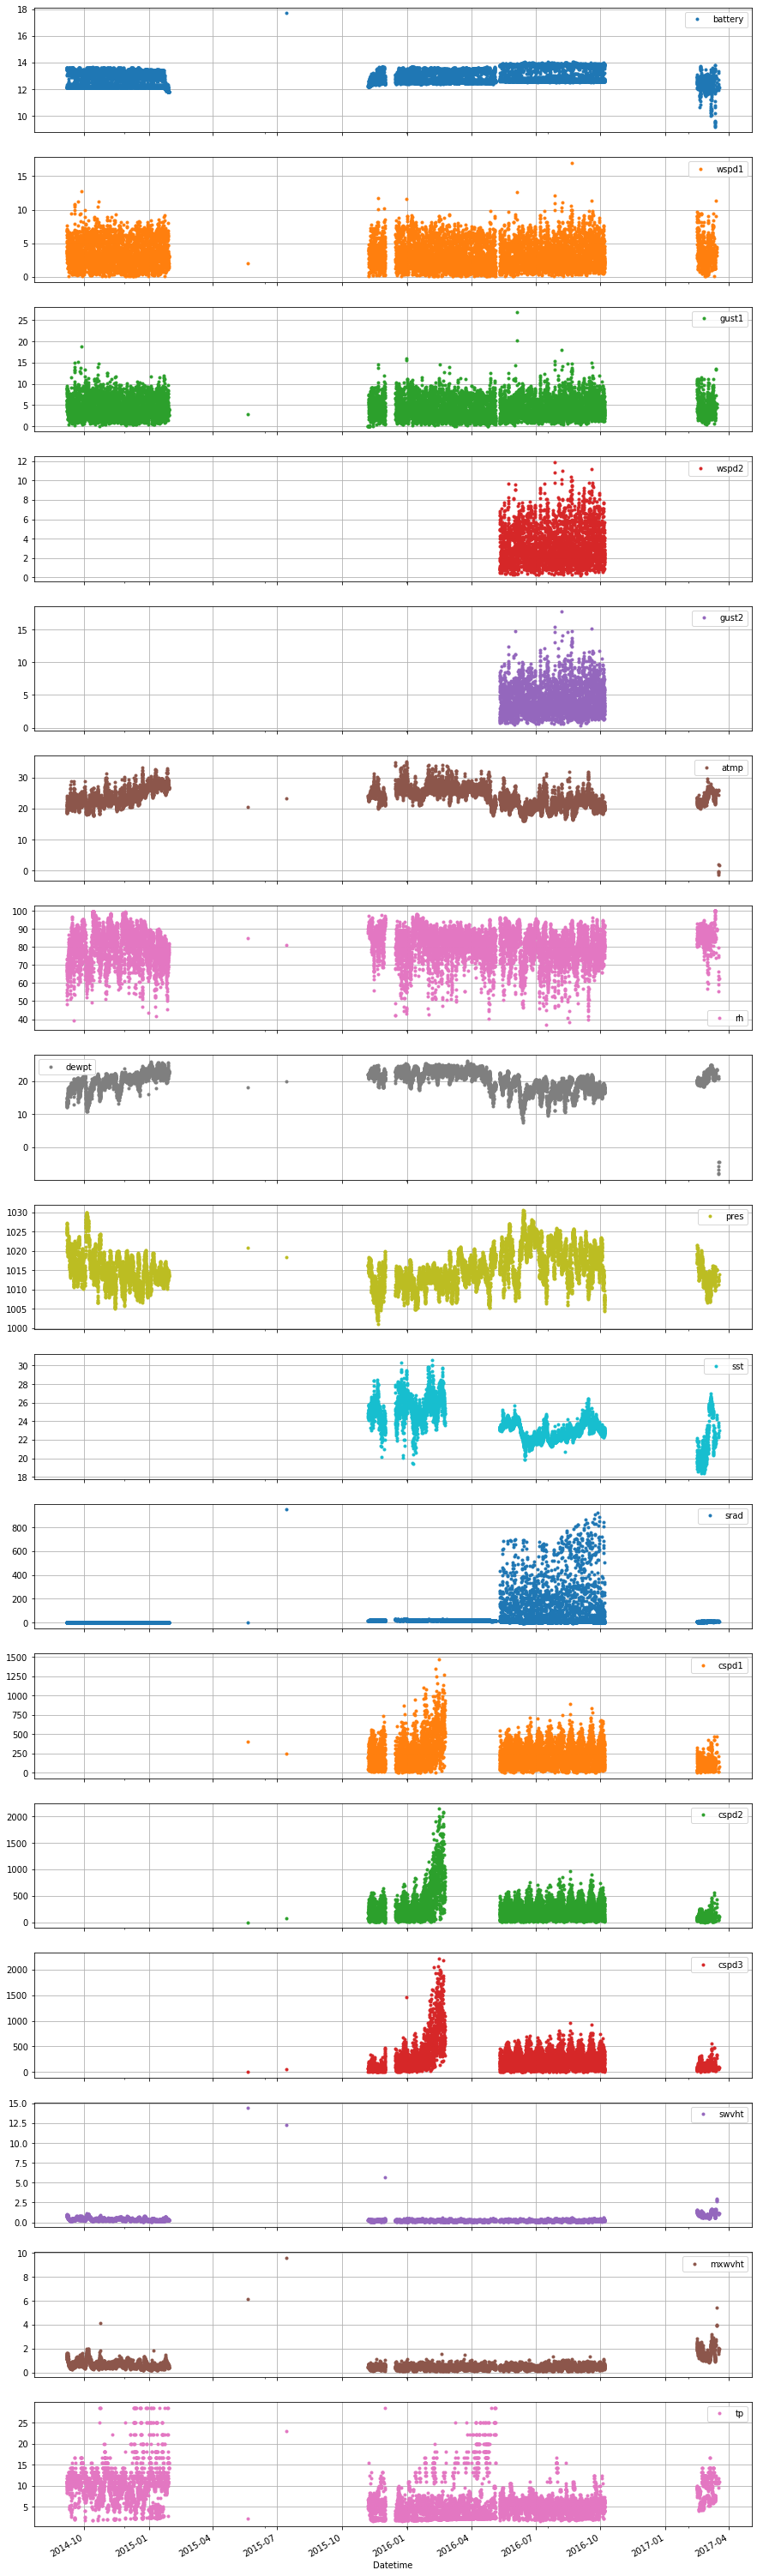

In [38]:
niteroi.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

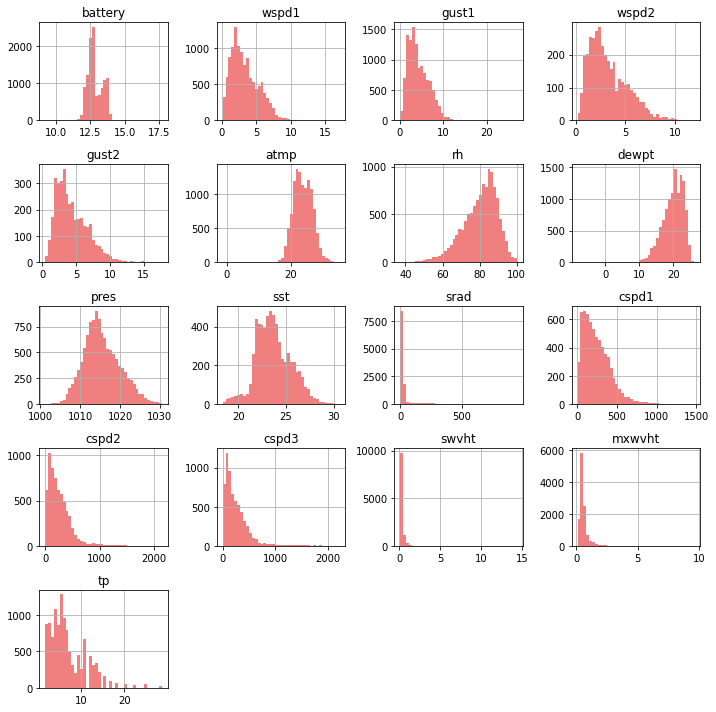

In [39]:
niteroi.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [40]:
# Generated lims
niteroi_out_lims_df_3 = gen_outlier_lim(niteroi, buoy_name='niteroi', std_factor=3).round(1)

# Generate lims dict
niteroi_out_lims_dict_3 = manual_outlier_lims(niteroi_out_lims_df_3, buoy_name='niteroi')

# filter data with
niteroi3 = filter_data(data=niteroi,
                    buoy='niteroi',
                    limits=niteroi_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=niteroi_out_lims_dict_3)

outlier_check done.


In [41]:
# Generated lims
niteroi_out_lims_df_5 = gen_outlier_lim(niteroi, buoy_name='niteroi', std_factor=5).round(1)

# Generate lims dict
niteroi_out_lims_dict_5 = manual_outlier_lims(niteroi_out_lims_df_5, buoy_name='niteroi')

# filter data with
niteroi2 = filter_data(data=niteroi,
                    buoy='niteroi',
                    limits=niteroi_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=niteroi_out_lims_dict_5)

outlier_check done.


In [42]:
niteroi_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,3.3,2.0,3.0,5.9,0.0,9.3
gust1,4.3,2.4,3.0,7.2,0.0,11.6
wspd2,3.3,1.9,3.0,5.7,0.0,9.0
gust2,4.4,2.3,3.0,7.0,0.0,11.4
atmp,23.8,2.9,3.0,8.8,14.9,32.6
rh,80.3,9.3,3.0,27.9,52.4,108.1
dewpt,20.1,3.0,3.0,9.1,11.0,29.1
pres,1015.4,4.5,3.0,13.6,1001.8,1029.1
sst,23.7,1.9,3.0,5.6,18.1,29.2


In [43]:
niteroi_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,3.3,2.0,5.0,9.9,0.0,13.2
gust1,4.3,2.4,5.0,12.1,0.0,16.4
wspd2,3.3,1.9,5.0,9.5,0.0,12.8
gust2,4.4,2.3,5.0,11.7,0.0,16.1
atmp,23.8,2.9,5.0,14.7,9.0,38.5
rh,80.3,9.3,5.0,46.5,33.8,126.7
dewpt,20.1,3.0,5.0,15.1,5.0,35.2
pres,1015.4,4.5,5.0,22.7,992.7,1038.2
sst,23.7,1.9,5.0,9.3,14.4,32.9


# Testing generated limits

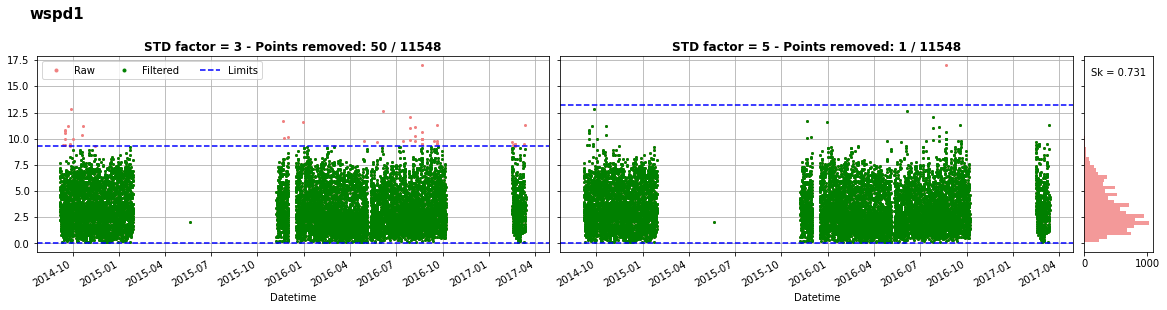

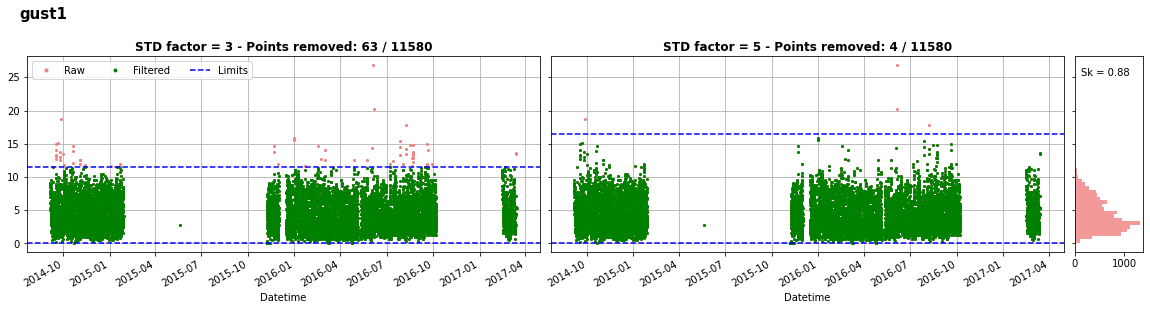

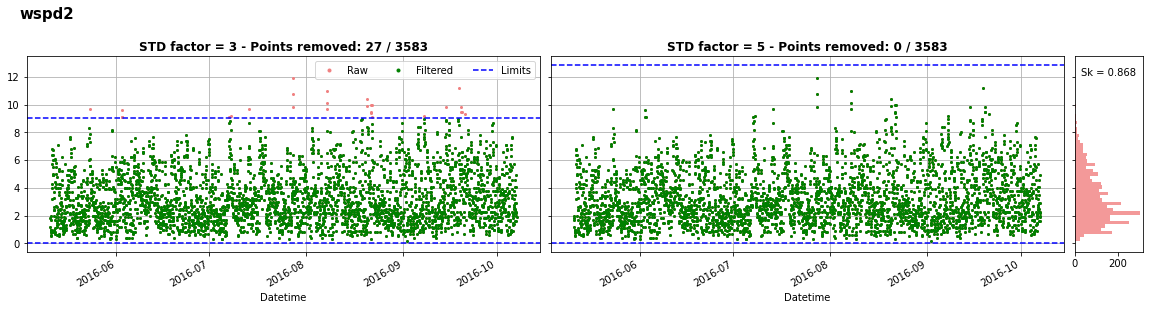

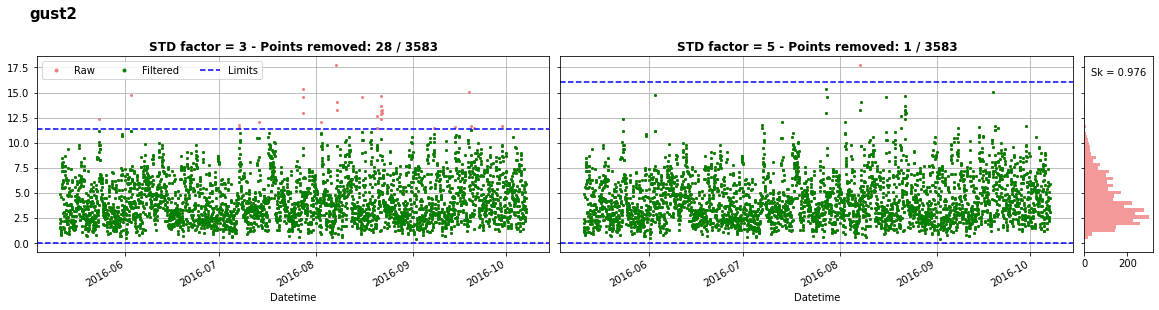

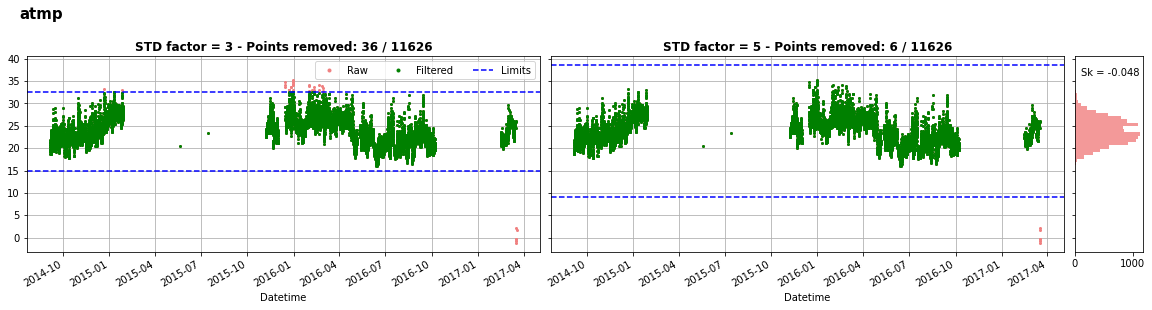

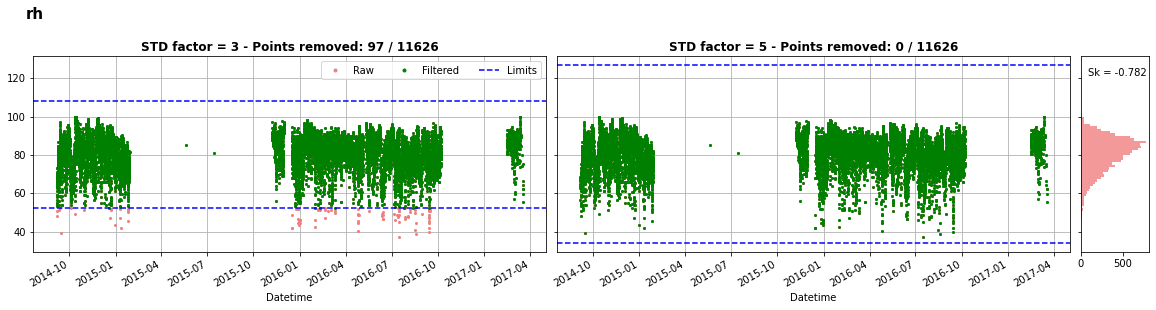

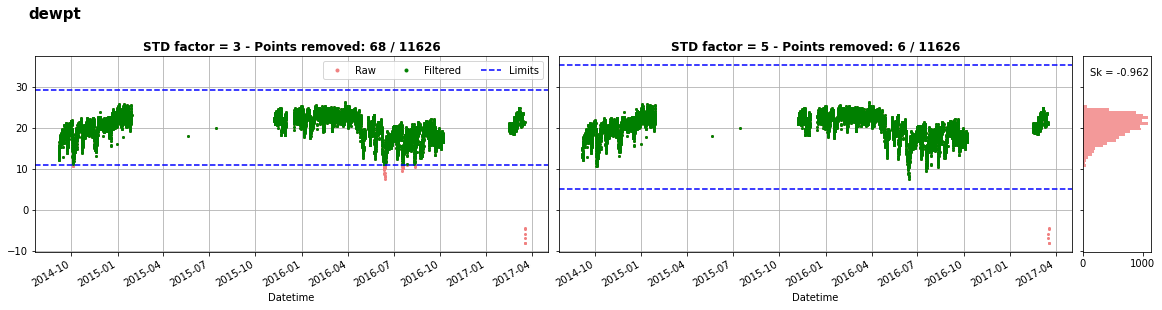

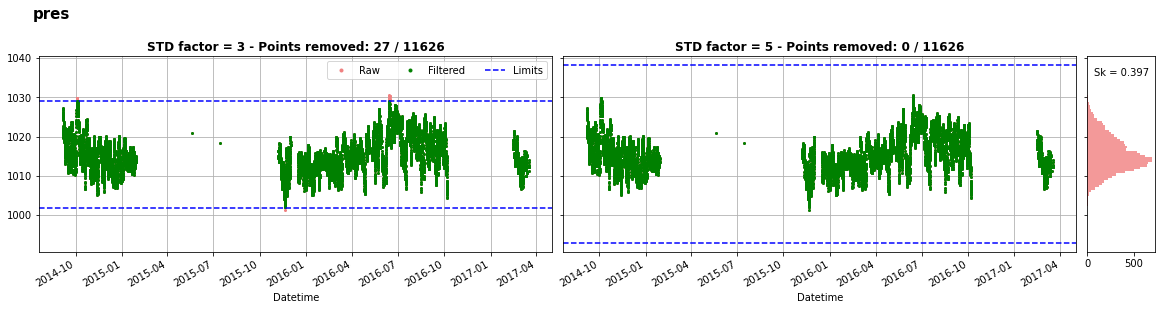

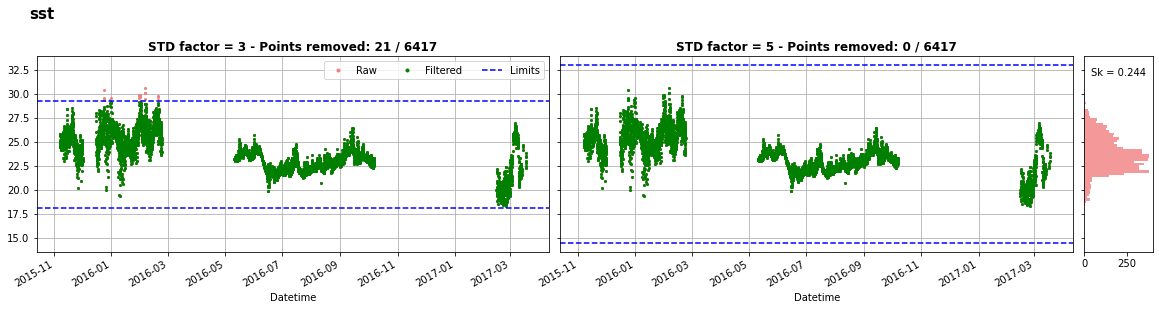

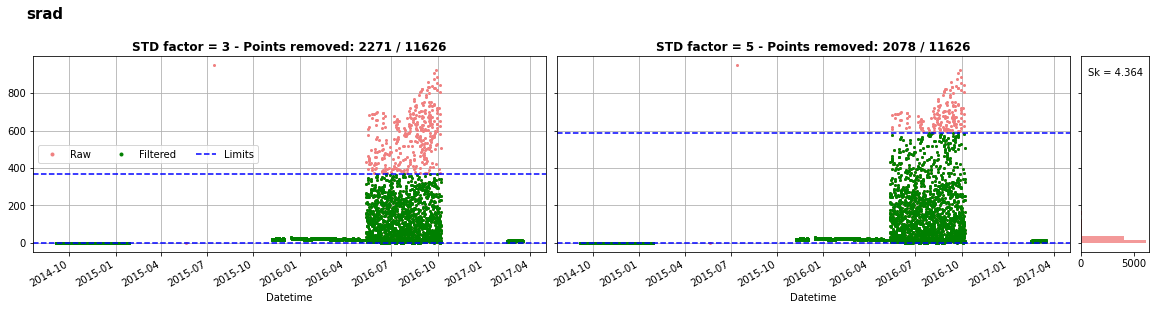

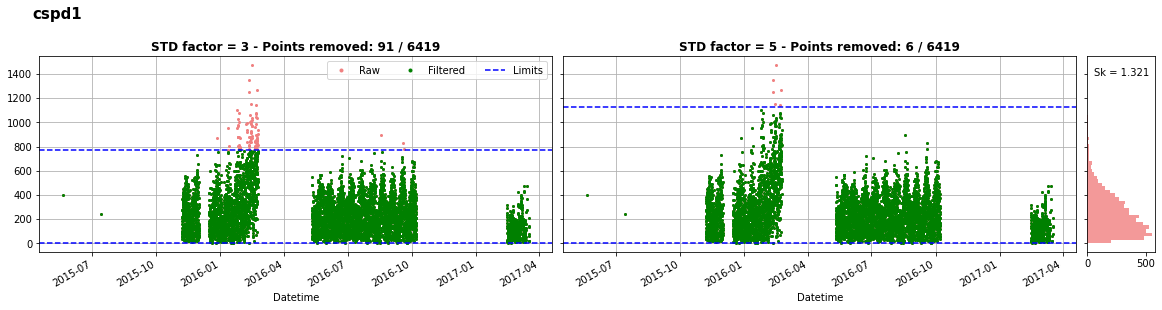

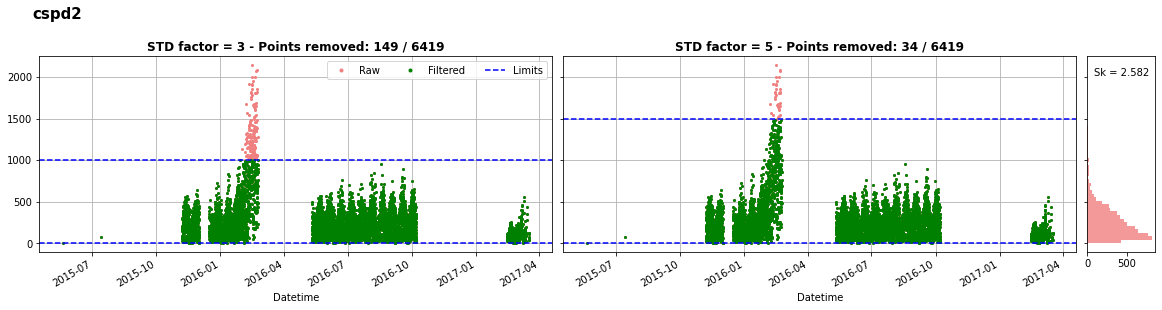

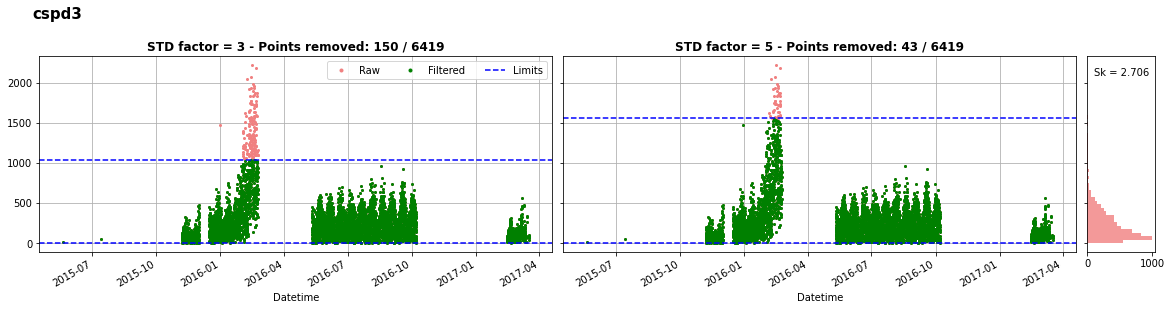

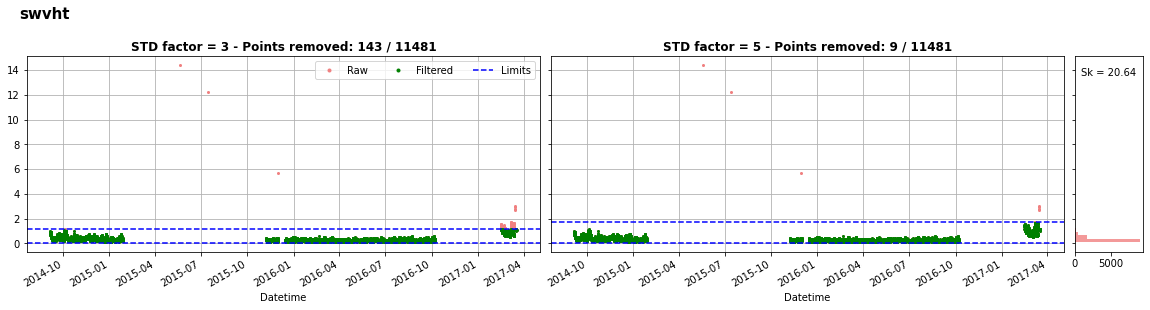

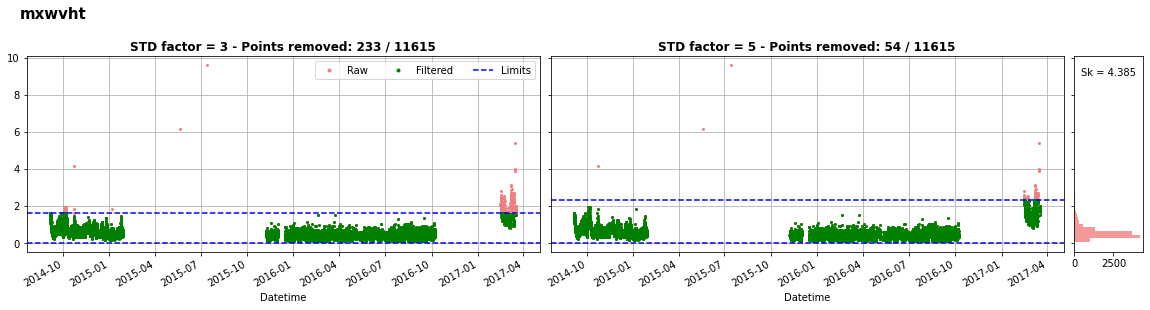

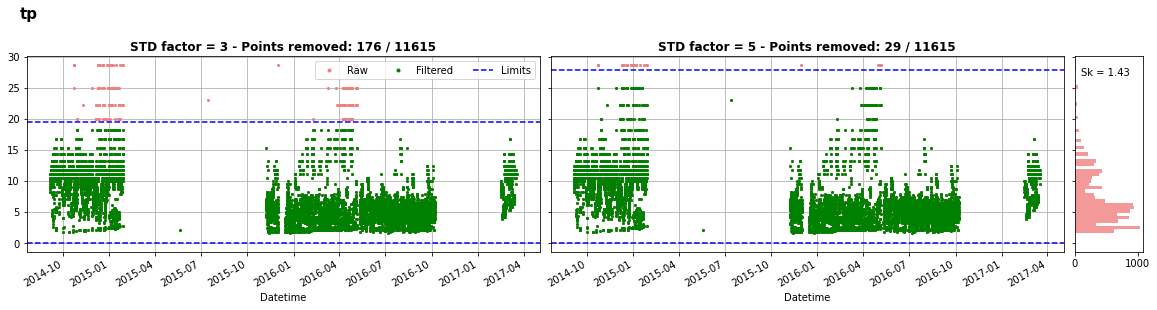

In [44]:
parameters = niteroi.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=niteroi,
                    limits=niteroi_lims,
                    buoy='niteroi',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

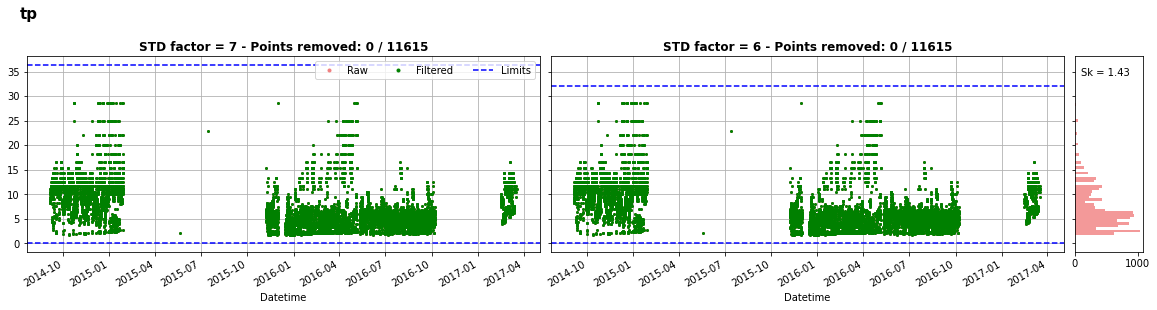

In [60]:
param = 'tp'
plot_comparison(factor1=7, 
                    factor2=6, 
                    data=niteroi,
                    limits=niteroi_lims,
                    buoy='niteroi',
                    parameter=param)
plt.show()

In [61]:
factors = {'wspd1': 6,
            'gust1': 10,
            'wspd2': 6,
            'gust2': 6,
            'atmp': 5,
            'rh': 5,
            'dewpt': 5,
            'pres': 5,
            'sst': 5,
            'srad': 10,
            # 'cspd1': X,
            # 'cspd2': X,
            # 'cspd3': X,
            'swvht': 7,
            'mxwvht': 8,
            'tp': 6}

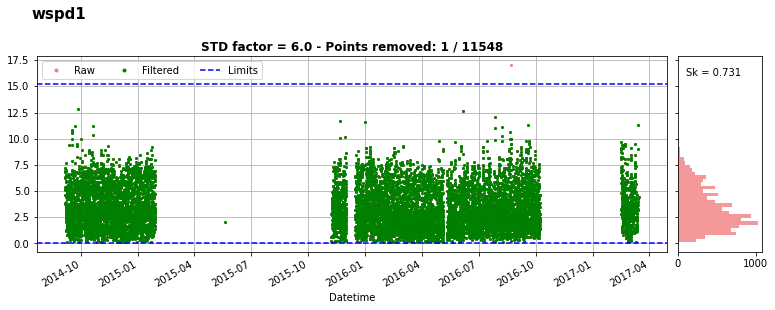

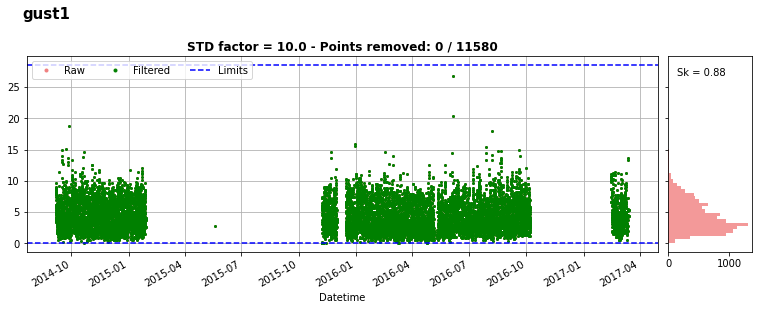

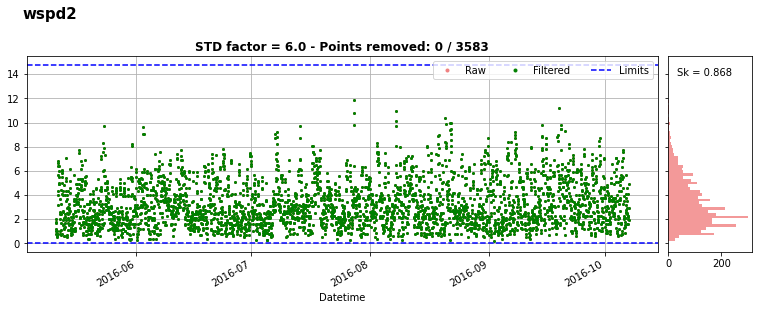

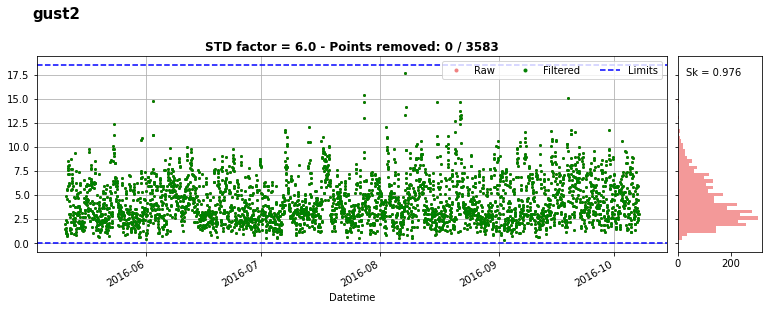

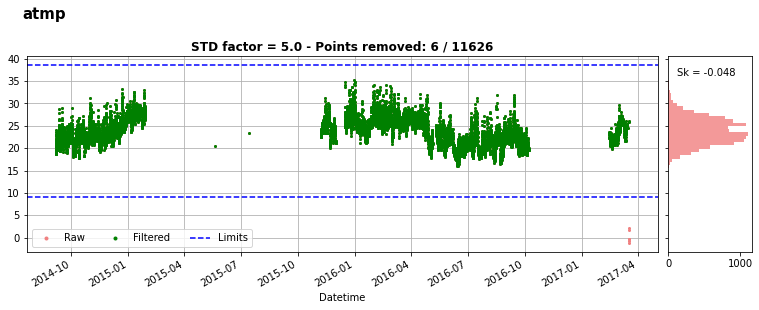

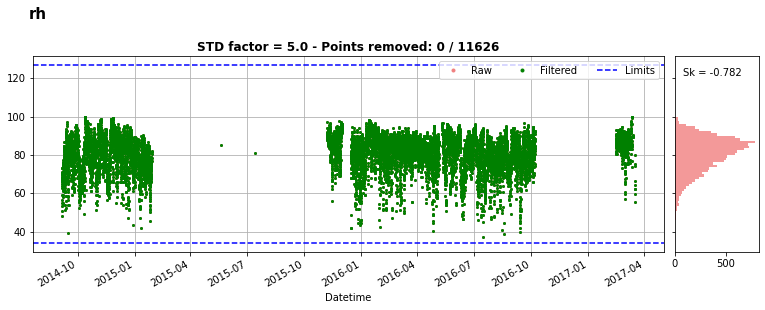

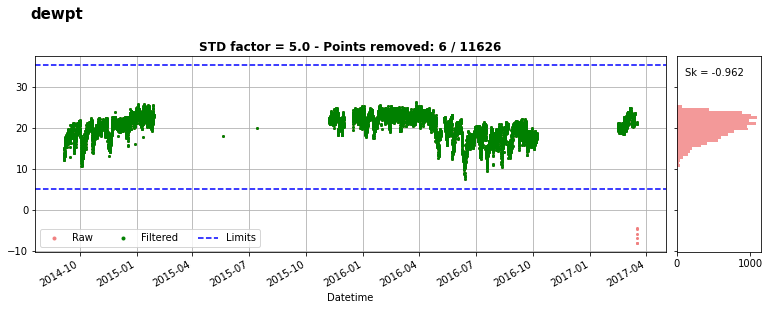

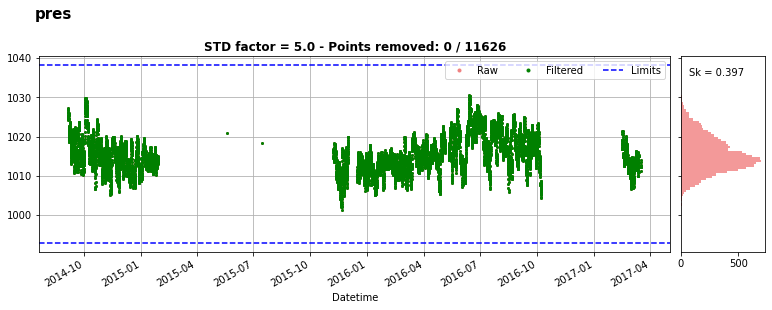

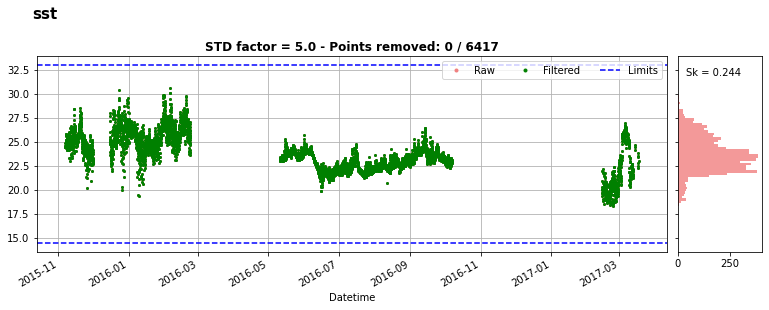

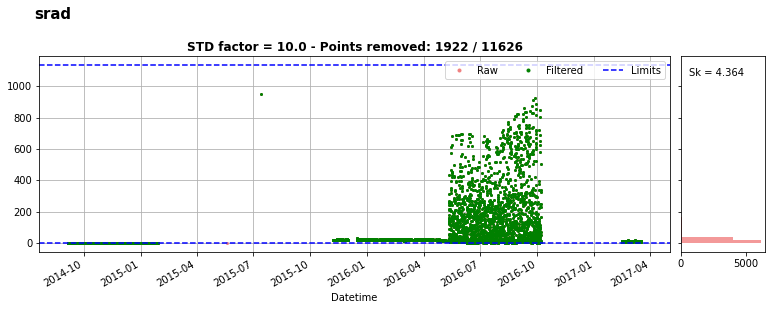

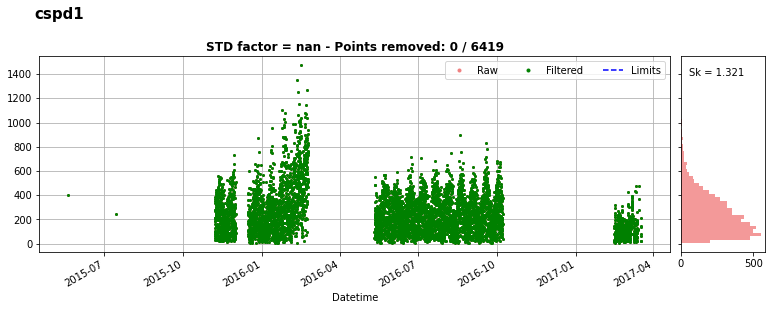

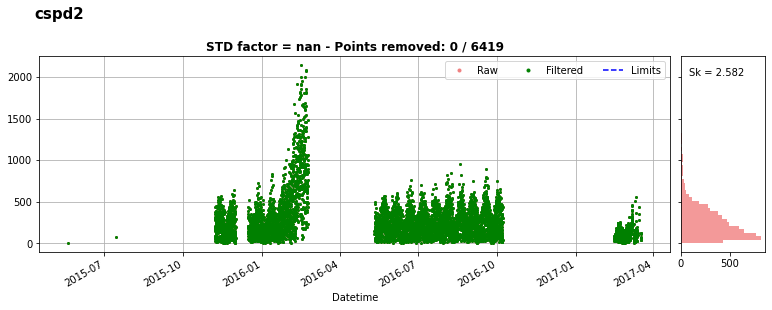

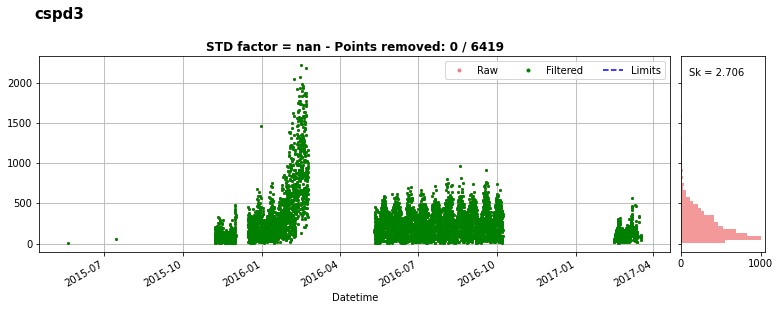

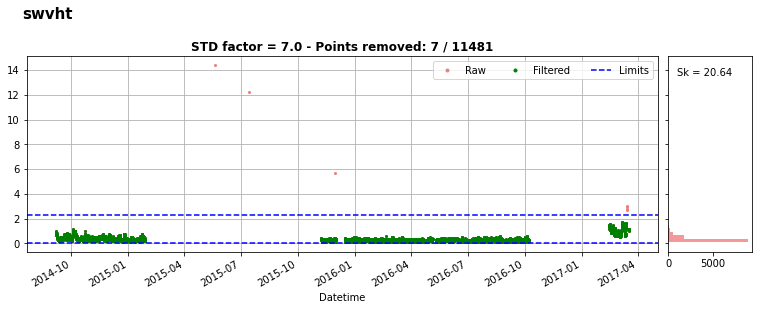

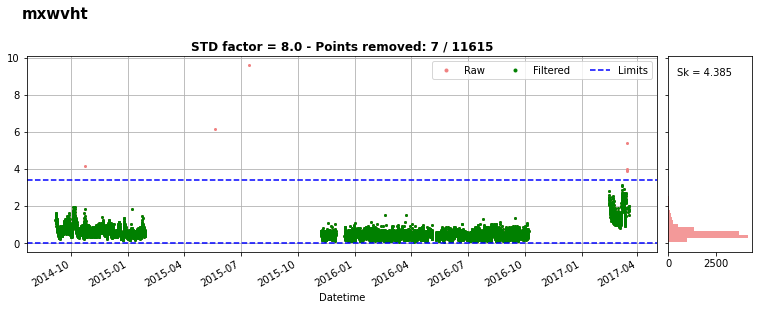

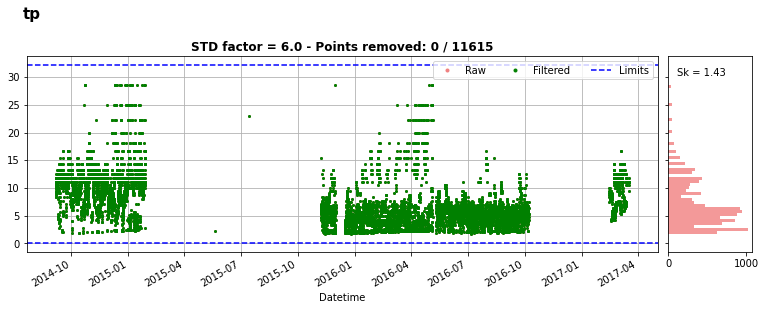

In [62]:
# FILTERING WITH DEFINITIVE FACTORS
niteroi_notdir = niteroi.drop(columns=niteroi.filter(regex='dir|head|spread').columns)
parameters = niteroi_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=niteroi,
                    limits=niteroi_lims,
                    buoy='niteroi',
                    parameter=param)
    plt.show()

In [63]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS FOR SANTOS BUOY

factors = {'wspd1': 6,
            'gust1': 10,
            'wspd2': 6,
            'gust2': 6,
            'atmp': 5,
            'rh': 5,
            'dewpt': 5,
            'pres': 5,
            'sst': 5,
            'srad': 10,
            # 'cspd1': X,
            # 'cspd2': X,
            # 'cspd3': X,
            'swvht': 7,
            'mxwvht': 8,
            'tp': 6}

niteroi_out_lims_df = gen_outlier_lim(data=niteroi,
                                     buoy_name='niteroi',
                                     std_factor=factors).round(1)

In [64]:
niteroi_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,3.3,2.0,6.0,11.9,0.0,15.2
gust1,4.3,2.4,10.0,24.1,0.0,28.5
wspd2,3.3,1.9,6.0,11.5,0.0,14.7
gust2,4.4,2.3,6.0,14.1,0.0,18.4
atmp,23.8,2.9,5.0,14.7,9.0,38.5
rh,80.3,9.3,5.0,46.5,33.8,126.7
dewpt,20.1,3.0,5.0,15.1,5.0,35.2
pres,1015.4,4.5,5.0,22.7,992.7,1038.2
sst,23.7,1.9,5.0,9.3,14.4,32.9


In [65]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS FOR SANTOS BUOY
niteroi_out_lims_dict = manual_outlier_lims(niteroi_out_lims_df, buoy_name='niteroi')

In [66]:
niteroi_out_lims_dict

{'wspd1': [0.0, 15.2],
 'gust1': [0.0, 28.5],
 'wspd2': [0.0, 14.7],
 'gust2': [0.0, 18.4],
 'atmp': [9.0, 38.5],
 'rh': [33.8, 126.7],
 'dewpt': [5.0, 35.2],
 'pres': [992.7, 1038.2],
 'sst': [14.4, 32.9],
 'srad': [0.0, 1132.6],
 'cspd1': [nan, nan],
 'cspd2': [nan, nan],
 'cspd3': [nan, nan],
 'swvht': [0.0, 2.3],
 'mxwvht': [0.0, 3.4],
 'tp': [0.0, 32.1]}

In [67]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
niteroi_definitive = filter_data(data=buoys_df_raw,
                    buoy='niteroi',
                    limits=niteroi_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=niteroi_out_lims_dict)

outlier_check done.
